Importing the dependencies and libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

Loading the dataset

In [2]:
chronic_data = pd.read_csv('../datasets/kidney_disease_train.csv')

In [3]:
chronic_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,347,43.0,60.0,1.025,0.0,0.0,abnormal,abnormal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,poor,no,no,notckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [4]:
chronic_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,347,43.0,60.0,1.025,0.0,0.0,abnormal,abnormal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,poor,no,no,notckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600,3.2,yes,yes,no,good,no,no,ckd
276,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500,NaN,yes,yes,no,good,yes,yes,ckd
277,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200,5,no,no,no,good,no,no,notckd
278,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300,6.4,no,no,no,good,no,no,notckd


In [5]:
chronic_data.isnull().sum()

id                  0
age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 77
rc                 93
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [6]:
chronic_data['classification'].value_counts()

ckd       174
notckd    106
Name: classification, dtype: int64

Converting the String object to integer

In [7]:
for column in chronic_data.columns:
    if chronic_data[column].dtype == 'object':
        le = LabelEncoder()
        chronic_data[column] = le.fit_transform(chronic_data[column])

In [8]:
chronic_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,347,43.0,60.0,1.025,0.0,0.0,0,0,0,0,...,43.0,53,33,0,0,0,1,0,0,1
1,109,54.0,70.0,NaN,NaN,NaN,2,2,0,0,...,NaN,78,45,0,1,0,0,0,0,0
2,17,47.0,80.0,NaN,NaN,NaN,2,2,0,0,...,NaN,78,45,1,0,0,1,0,0,0
3,157,62.0,70.0,1.025,3.0,0.0,1,0,0,0,...,39.0,59,17,1,1,0,0,0,0,0
4,24,42.0,100.0,1.015,4.0,0.0,1,0,0,1,...,39.0,63,24,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71,46.0,60.0,1.010,1.0,0.0,1,1,0,0,...,28.0,18,10,1,1,0,0,0,0,0
276,106,50.0,90.0,NaN,NaN,NaN,2,2,0,0,...,17.0,47,45,1,1,0,0,1,1,0
277,270,23.0,80.0,1.025,0.0,0.0,1,1,0,0,...,41.0,53,28,0,0,0,0,0,0,1
278,348,38.0,80.0,1.020,0.0,0.0,1,1,0,0,...,44.0,54,42,0,0,0,0,0,0,1


In [9]:
chronic_data.to_csv('../datasets/processed_data.csv', index=False)

Cleaning of Data

In [10]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(chronic_data)
chronic_data = pd.DataFrame(imputer.transform(chronic_data), columns=chronic_data.columns)

In [11]:
chronic_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,347.0,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,53.0,33.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,109.0,54.0,70.0,1.020,0.0,0.0,2.0,2.0,0.0,0.0,...,52.0,78.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,17.0,47.0,80.0,1.020,0.0,0.0,2.0,2.0,0.0,0.0,...,52.0,78.0,45.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,157.0,62.0,70.0,1.025,3.0,0.0,1.0,0.0,0.0,0.0,...,39.0,59.0,17.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,24.0,42.0,100.0,1.015,4.0,0.0,1.0,0.0,0.0,1.0,...,39.0,63.0,24.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71.0,46.0,60.0,1.010,1.0,0.0,1.0,1.0,0.0,0.0,...,28.0,18.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
276,106.0,50.0,90.0,1.020,0.0,0.0,2.0,2.0,0.0,0.0,...,17.0,47.0,45.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
277,270.0,23.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,41.0,53.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
278,348.0,38.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,44.0,54.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Feature selection

In [12]:
x = chronic_data.drop(["id","classification"], axis=1)
y = chronic_data['classification']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,17.8,43.0,53.0,33.0,0.0,0.0,0.0,1.0,0.0,0.0
1,54.0,70.0,1.020,0.0,0.0,2.0,2.0,0.0,0.0,233.0,...,11.7,52.0,78.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0
2,47.0,80.0,1.020,0.0,0.0,2.0,2.0,0.0,0.0,114.0,...,12.1,52.0,78.0,45.0,1.0,0.0,0.0,1.0,0.0,0.0
3,62.0,70.0,1.025,3.0,0.0,1.0,0.0,0.0,0.0,122.0,...,12.6,39.0,59.0,17.0,1.0,1.0,0.0,0.0,0.0,0.0
4,42.0,100.0,1.015,4.0,0.0,1.0,0.0,0.0,1.0,99.0,...,11.1,39.0,63.0,24.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,46.0,60.0,1.010,1.0,0.0,1.0,1.0,0.0,0.0,163.0,...,9.8,28.0,18.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0
276,50.0,90.0,1.020,0.0,0.0,2.0,2.0,0.0,0.0,89.0,...,6.0,17.0,47.0,45.0,1.0,1.0,0.0,0.0,1.0,1.0
277,23.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,111.0,...,14.3,41.0,53.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
278,38.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,99.0,...,13.6,44.0,54.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
275    0.0
276    0.0
277    1.0
278    1.0
279    0.0
Name: classification, Length: 280, dtype: float64

Applying the K - fold Cross Validation

In [15]:
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42, probability=True)
xgb_model = XGBClassifier()

kfold = KFold(n_splits=7, shuffle=True, random_state=42)

rf_scores = cross_val_score(rf_model, x, y, cv=kfold)
print(f"Random Forest CV Scores: {rf_scores}")
print(f"Random Forest CV Mean Score: {rf_scores.mean()}")
print("--"*40)

svm_scores = cross_val_score(svm_model, x, y, cv=kfold)
print(f"SVM CV Scores: {svm_scores}")
print(f"SVM CV Mean Score: {svm_scores.mean()}")
print("--"*40)

xgb_scores = cross_val_score(xgb_model, x, y, cv=kfold)
print(f"XGBoost CV Scores: {xgb_scores}")
print(f"XGBoost CV Mean Score: {xgb_scores.mean()}")
print("--"*40)

Random Forest CV Scores: [1.    0.975 0.975 1.    1.    0.975 1.   ]
Random Forest CV Mean Score: 0.9892857142857142
--------------------------------------------------------------------------------
SVM CV Scores: [0.85  0.775 0.95  0.825 0.925 0.65  0.825]
SVM CV Mean Score: 0.8285714285714286
--------------------------------------------------------------------------------
XGBoost CV Scores: [1.    0.975 1.    1.    1.    0.975 1.   ]
XGBoost CV Mean Score: 0.9928571428571428
--------------------------------------------------------------------------------


Applying the Support Vector Machine Model

Accuracy on train data by SVM Classifier: 85.26785714285714


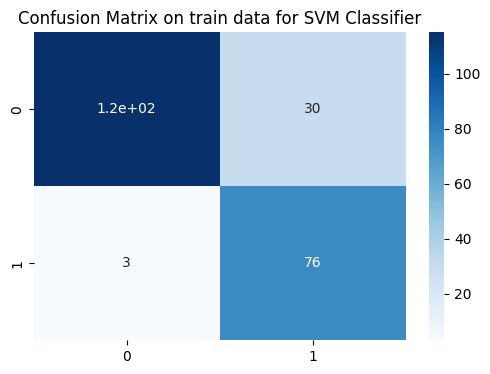

Accuracy on test data by SVM Classifier: 85.71428571428571


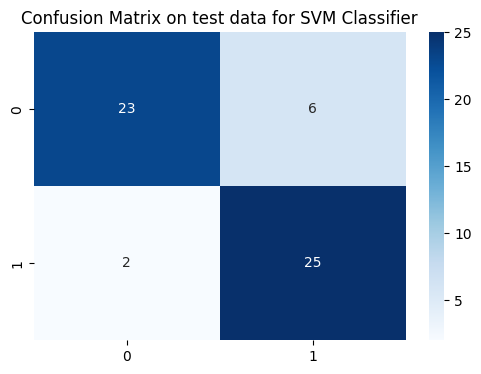

In [16]:
svm_model.fit(xTrain, yTrain)
preds_test = svm_model.predict(xTest)
preds_train = svm_model.predict(xTrain)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(yTrain, svm_model.predict(xTrain))*100}")
cf_matrix_train = confusion_matrix(yTrain, preds_train)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues')
plt.title("Confusion Matrix on train data for SVM Classifier")
plt.show()

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(yTest, preds_test)*100}")
cf_matrix = confusion_matrix(yTest, preds_test)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix on test data for SVM Classifier")
plt.show()

Applying the Random Forest Model

Accuracy on train data by Random Forest Classifier: 100.0


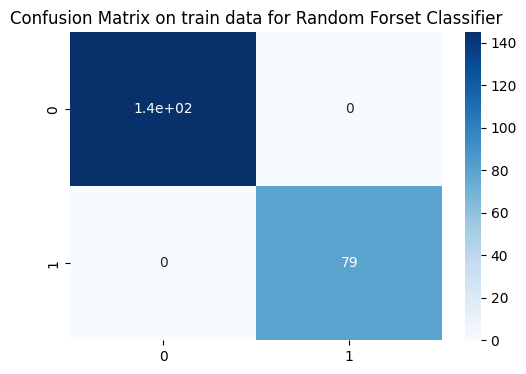

Accuracy on test data by Random Forest Classifier: 98.21428571428571


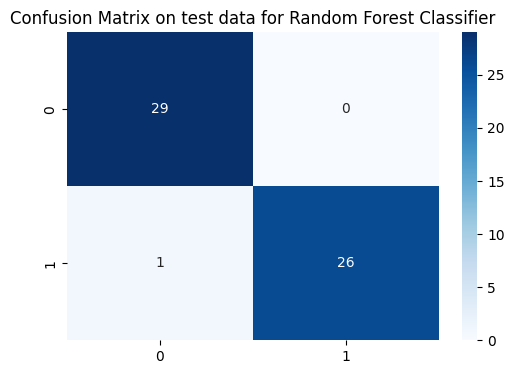

In [17]:
rf_model.fit(xTrain, yTrain)
preds_test = rf_model.predict(xTest)
preds_train = rf_model.predict(xTrain)

print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(yTrain, rf_model.predict(xTrain))*100}")

cf_matrix_train = confusion_matrix(yTrain, preds_train)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues')
plt.title("Confusion Matrix on train data for Random Forset Classifier")
plt.show()

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(yTest, preds_test)*100}")

cf_matrix = confusion_matrix(yTest, preds_test)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix on test data for Random Forest Classifier")
plt.show()

Applying the XGBoost Model

Accuracy on the train data XGBoost Classifier : 100.0


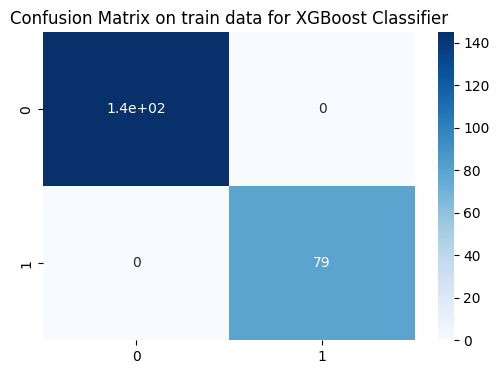

Accuracy on the test data by XGBoost Classifier: 100.0


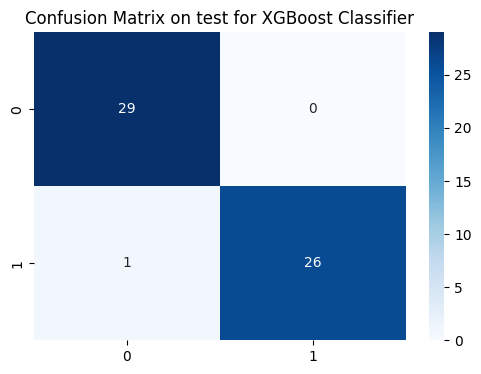

In [18]:
xgb_model.fit(xTrain, yTrain)
predict_test = xgb_model.predict(xTest)
predict_train = xgb_model.predict(xTrain)

print(f"Accuracy on the train data XGBoost Classifier : {accuracy_score(yTrain, xgb_model.predict(xTrain)) * 100}")
cf_matrix_train = confusion_matrix(yTrain, predict_train)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues')
plt.title("Confusion Matrix on train data for XGBoost Classifier")
plt.show()

print(f"Accuracy on the test data by XGBoost Classifier: {accuracy_score(yTest, predict_test) * 100}")

cf_matrix = confusion_matrix(yTest, preds_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix on test for XGBoost Classifier")
plt.show()

Combining the model

In [19]:
input_data = (29.0,80.0,1.02,0.0,0.0,1,1,0,0,83.0,49.0,0.9,139.0,3.3,17.5,40.0,77,27,0,2,1,0,0,0)

input_data = np.asarray(input_data)

input_data_reshaped = input_data.reshape(1, -1)

In [20]:
result = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model), ('xgb', xgb_model)], voting='soft')

result.fit(xTrain, yTrain)
prediction = result.predict(input_data_reshaped)

if prediction[0] == 0:
    print("The person is diseased with Chronic Kidney disease")
else:
    print("The person is not diseased with Chronic Kidney disease")

The person is not diseased with Chronic Kidney disease


C:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
import pickle
filename = '../models/trained_model_chronic_kidney.sav'
pickle.dump(result, open(filename, 'wb'))
loaded_model = pickle.load(open('../models/trained_model_chronic_kidney.sav', 'rb'))
input_data = (29.0,80.0,1.02,0.0,0.0,1,1,0,0,83.0,49.0,0.9,139.0,3.3,17.5,40.0,77,27,0,2,1,0,0,0)
input_data = np.asarray(input_data)

input_data_reshaped = input_data.reshape(1, -1)

result = loaded_model.predict(input_data_reshaped)

if result[0] == 0:
    print("The person is diseased with Chronic Kidney disease")
else:
    print("The person is not diseased with Chronic Kidney disease")

The person is not diseased with Chronic Kidney disease


C:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
